# Check Spatial Autocorrelation of residuals
ArcGIS PRO - R

In [6]:
###### Importing ####
library(arcgisbinding)
library(sp)
library(spdep)


In [7]:
#### Initialize arcgisbinding ####
arc.check_product()

product: ArcGIS Pro ( 12.0.0.8348 )
license: Advanced

In [25]:
##### Current workspace 
getwd()

#### Input Variables ####
fullPath = '../data'
inputFC = file.path(fullPath, "pysal_automodel.shp")
galFile = file.path(fullPath,"queen.gal")
uniqueField  = 'MYID'
residualField = 'RESID'


[1] "C:/Dev_summit/repos/gis-stat-analysis-py-tutor/notebooks"

In [26]:
### Loading dataset
info <- arc.open(inputFC)
#### Create Data.Frame ####
df <- arc.select(info, c(uniqueField, residualField))
head(df)

MYID,RESID
158,0.05001064
159,-0.10076178
160,-0.08984409
161,0.09165525
162,0.17979697
163,0.01613230


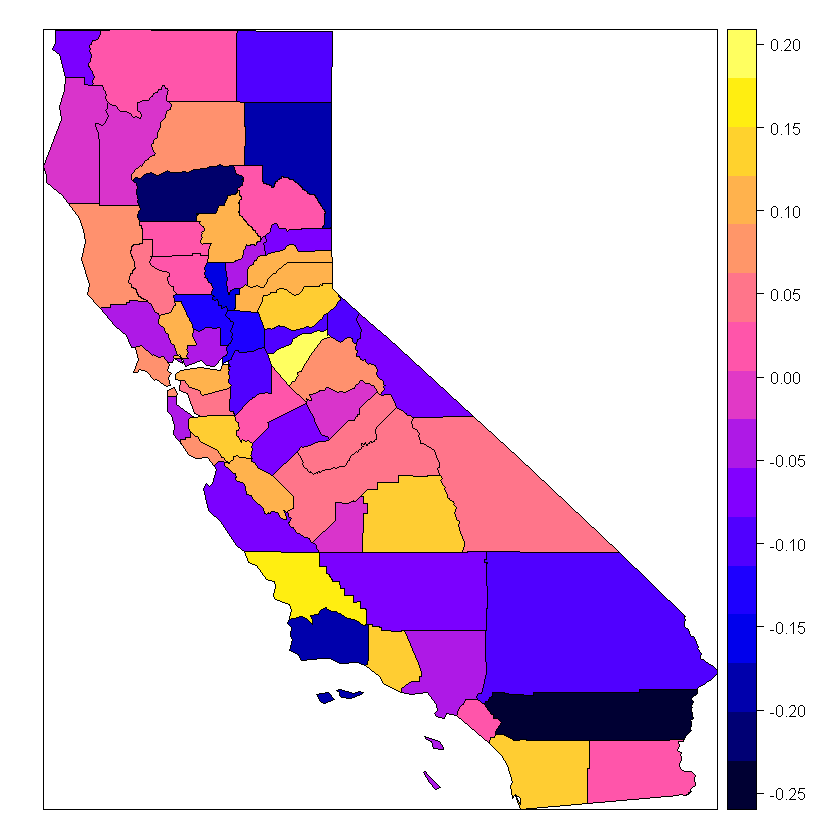

In [27]:
#### Spatial Data Object####
spObject <- arc.data2sp(df)

#### Plot Spatial Data #### 
spplot(spObject[residualField])

In [28]:
#### Loading Spatial Dependence Weight Matrix ####
gal  <- read.gal(galFile, df[[uniqueField]])

#### Weights #####
col.W <- nb2listw(gal, style="W")
col.W

Characteristics of weights list object:
Neighbour list object:
Number of regions: 58 
Number of nonzero links: 272 
Percentage nonzero weights: 8.085612 
Average number of links: 4.689655 

Weights style: W 
Weights constants summary:
   n   nn S0       S1       S2
W 58 3364 58 27.57541 238.6975

In [29]:
### Calculate Moran ####
moranI = moran(df[[residualField]], col.W, length(gal), Szero(col.W))
print(moranI$I)

[1] -0.1984385


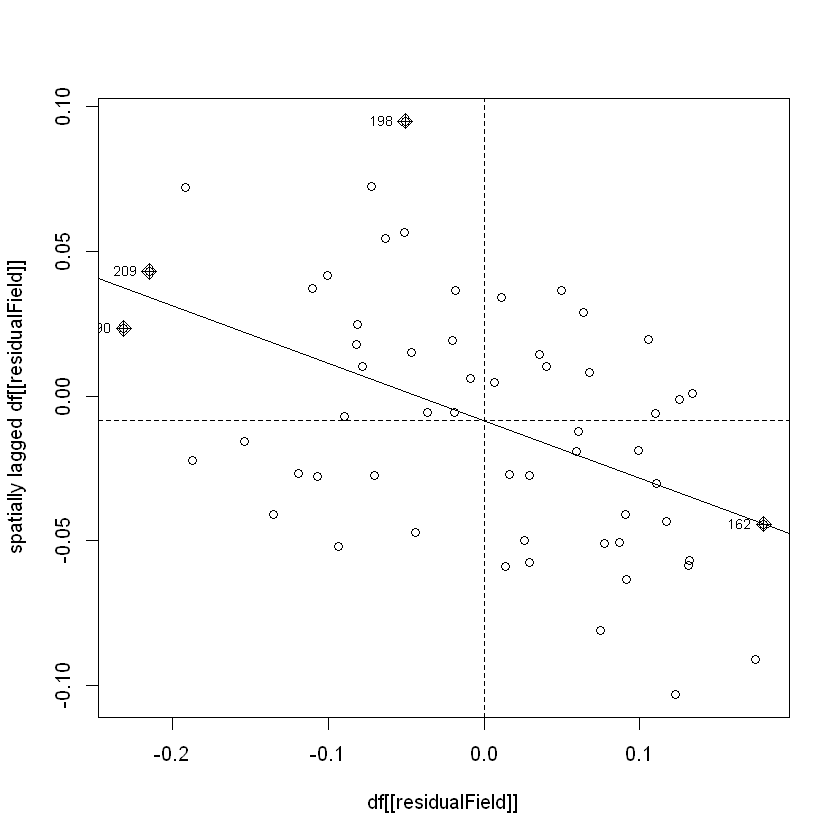

In [31]:
### Moran plot ###
moran.plot(df[[residualField]], col.W)
